Warm-Up 3/20/24

In [9]:
even_numbers_through_1000 = [x for x in range(1001) if x % 2 == 0]
even_numbers_through_1000

[0,
 2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 40,
 42,
 44,
 46,
 48,
 50,
 52,
 54,
 56,
 58,
 60,
 62,
 64,
 66,
 68,
 70,
 72,
 74,
 76,
 78,
 80,
 82,
 84,
 86,
 88,
 90,
 92,
 94,
 96,
 98,
 100,
 102,
 104,
 106,
 108,
 110,
 112,
 114,
 116,
 118,
 120,
 122,
 124,
 126,
 128,
 130,
 132,
 134,
 136,
 138,
 140,
 142,
 144,
 146,
 148,
 150,
 152,
 154,
 156,
 158,
 160,
 162,
 164,
 166,
 168,
 170,
 172,
 174,
 176,
 178,
 180,
 182,
 184,
 186,
 188,
 190,
 192,
 194,
 196,
 198,
 200,
 202,
 204,
 206,
 208,
 210,
 212,
 214,
 216,
 218,
 220,
 222,
 224,
 226,
 228,
 230,
 232,
 234,
 236,
 238,
 240,
 242,
 244,
 246,
 248,
 250,
 252,
 254,
 256,
 258,
 260,
 262,
 264,
 266,
 268,
 270,
 272,
 274,
 276,
 278,
 280,
 282,
 284,
 286,
 288,
 290,
 292,
 294,
 296,
 298,
 300,
 302,
 304,
 306,
 308,
 310,
 312,
 314,
 316,
 318,
 320,
 322,
 324,
 326,
 328,
 330,
 332,
 334,
 336,
 338,
 340,
 342,
 344,
 346,
 348,
 350,

In [10]:
even_numbers_through_1000_with_8 = [num for num in even_numbers_through_1000 if '8' in str(num)]
even_numbers_through_1000_with_8

[8,
 18,
 28,
 38,
 48,
 58,
 68,
 78,
 80,
 82,
 84,
 86,
 88,
 98,
 108,
 118,
 128,
 138,
 148,
 158,
 168,
 178,
 180,
 182,
 184,
 186,
 188,
 198,
 208,
 218,
 228,
 238,
 248,
 258,
 268,
 278,
 280,
 282,
 284,
 286,
 288,
 298,
 308,
 318,
 328,
 338,
 348,
 358,
 368,
 378,
 380,
 382,
 384,
 386,
 388,
 398,
 408,
 418,
 428,
 438,
 448,
 458,
 468,
 478,
 480,
 482,
 484,
 486,
 488,
 498,
 508,
 518,
 528,
 538,
 548,
 558,
 568,
 578,
 580,
 582,
 584,
 586,
 588,
 598,
 608,
 618,
 628,
 638,
 648,
 658,
 668,
 678,
 680,
 682,
 684,
 686,
 688,
 698,
 708,
 718,
 728,
 738,
 748,
 758,
 768,
 778,
 780,
 782,
 784,
 786,
 788,
 798,
 800,
 802,
 804,
 806,
 808,
 810,
 812,
 814,
 816,
 818,
 820,
 822,
 824,
 826,
 828,
 830,
 832,
 834,
 836,
 838,
 840,
 842,
 844,
 846,
 848,
 850,
 852,
 854,
 856,
 858,
 860,
 862,
 864,
 866,
 868,
 870,
 872,
 874,
 876,
 878,
 880,
 882,
 884,
 886,
 888,
 890,
 892,
 894,
 896,
 898,
 908,
 918,
 928,
 938,
 948,
 958,
 968,
 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
# to understand if imbalanced: look at value counts for outcome
diabetes_df['Outcome'].value_counts()

# really, this is a dataset where we do not need to use 
#oversampling or undersampling because its not THAT imbalanced

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome',axis=1)
y = diabetes_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state =32,
                                                    stratify=y)


Oversampling

In [10]:
# pip install imblearn
# resample our training data with RandomOverSampler (naive approach)
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=32)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [13]:
# train using resampled data
model = LogisticRegression(random_state=32)
model.fit(X_resampled, y_resampled)

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=32)

In [14]:
y_pred = model.predict(X_test)

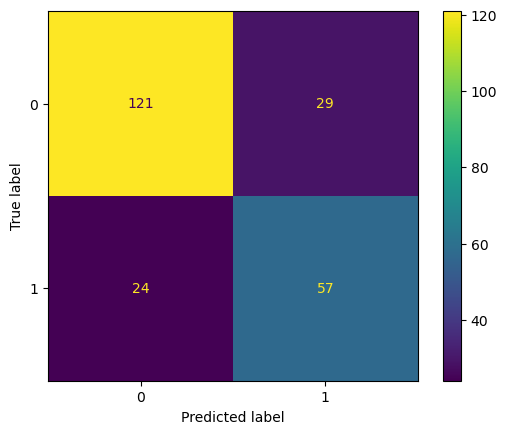

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [16]:
# what is our recall?
# TP/(TP + FN)
# 57/ (57 + 24)
57/ (57+24)

0.7037037037037037

In [17]:
# old recall
30/(30+24)

0.5555555555555556

Undersampling

In [19]:
# clusterCentroids uses k-means to reduce the number of samples
from imblearn.under_sampling import ClusterCentroids

rus = ClusterCentroids(random_state=32)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

/usr/lib/python3/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
model = LogisticRegression(random_state=32)
model.fit(X_resampled, y_resampled)

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=32)

In [21]:
y_pred = model.predict(X_test)

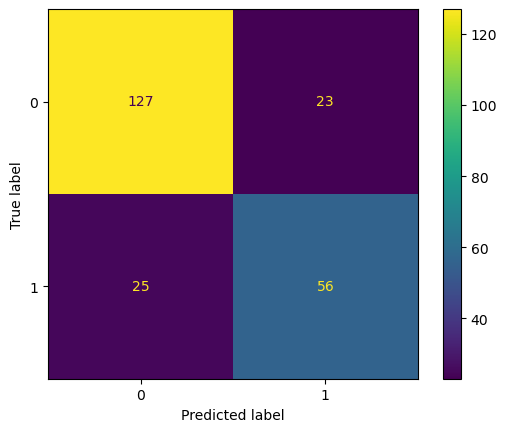

In [22]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [24]:
# recall for undersampling
56/(56+25)

0.691358024691358